In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# importing algorithm & data split feature
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# importing evaluation metrices
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

pd.pandas.set_option("display.max_columns",None)

import warnings
warnings.filterwarnings('ignore')

#  Problem Statement:

#  Data Gathering

In [2]:
df=pd.read_excel('Package Pricing.xlsx')
df.head(10)

SL.   AGE GENDER MARITAL STATUS KEY COMPLAINTS -CODE  BODY WEIGHT  \
0    1  58.0      M        MARRIED         other- heart         49.2   
1    2  59.0      M        MARRIED              CAD-DVD         41.0   
2    3  82.0      M        MARRIED              CAD-TVD         46.6   
3    4  46.0      M        MARRIED              CAD-DVD         80.0   
4    5  60.0      M        MARRIED              CAD-DVD         58.0   
5    6  75.0      M        MARRIED              CAD-DVD         45.0   
6    7  73.0      M        MARRIED              CAD-TVD         60.0   
7    8  71.0      M        MARRIED              CAD-TVD         43.8   
8    9  72.0      M        MARRIED              CAD-DVD         72.0   
9   10  61.0      M        MARRIED              CAD-TVD         76.6   

   BODY HEIGHT  HR PULSE  BP -HIGH  BP-LOW  RR PAST MEDICAL HISTORY CODE  \
0          160       118     100.0    80.0  32                       NaN   
1          155        78      70.0    50.0  28                       NaN   
2          164       100     110.0    80.0  20                 Diabetes2   
3          173       122     110.0    80.0  24             hypertension1   
4          175        72     180.0   100.0  18                 Diabetes2   
5          140       130     215.0   140.0  42                       NaN   
6          170       108     160.0    90.0  24                 Diabetes2   
7          164        60     130.0    90.0  22                       NaN   
8          174        95     100.0    50.0  25                 Diabetes2   
9          175        66     140.0    90.0  22                       NaN   

     HB  UREA  CREATININE MODE OF ARRIVAL STATE AT THE TIME OF ARRIVAL  \
0  11.4  33.0         0.8       AMBULANCE                        ALERT   
1  11.4  95.0         1.7       AMBULANCE                        ALERT   
2  11.8  15.0         0.8       WALKED IN                        ALERT   
3  11.8  74.0         1.5       AMBULANCE                        ALERT   
4  10.0  48.0         1.9       AMBULANCE                        ALERT   
5  11.8  29.0         1.0       AMBULANCE                        ALERT   
6  14.5  31.0         1.6       WALKED IN                        ALERT   
7  10.1  37.0         1.5       WALKED IN                        ALERT   
8   9.6  32.0         1.2       AMBULANCE                        ALERT   
9  14.0  15.0         0.4       WALKED IN                        ALERT   

  TYPE OF ADMSN  TOTAL COST TO HOSPITAL   TOTAL LENGTH OF STAY  \
0     EMERGENCY                660293.00                    25   
1     EMERGENCY                809130.00                    41   
2      ELECTIVE                362231.00                    18   
3     EMERGENCY                629990.00                    14   
4     EMERGENCY                444876.00                    24   
5     EMERGENCY                372357.00                    31   
6      ELECTIVE                887350.00                    15   
7     EMERGENCY                389827.00                    24   
8     EMERGENCY                437529.07                    26   
9      ELECTIVE                364222.00                    20   

   LENGTH OF STAY - ICU  LENGTH OF STAY- WARD IMPLANT USED (Y/N)  \
0                    12                    13                  Y   
1                    20                    21                  Y   
2                     9                     9                  N   
3                    13                     1                  Y   
4                    12                    12                  N   
5                     9                    22                  N   
6                    15                     0                  N   
7                    11                    13                  N   
8                     9                    17                  N   
9                     4                    16                  N   

   COST OF IMPLANT  
0            38000  
1            39690  
2                0 

In [3]:
df.shape

(248, 24)

# Data Analysis and Preparation

In [4]:
df.columns

Index(['SL.', 'AGE', 'GENDER', 'MARITAL STATUS', 'KEY COMPLAINTS -CODE',
       'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'BP -HIGH', 'BP-LOW', 'RR',
       'PAST MEDICAL HISTORY CODE', 'HB', 'UREA', 'CREATININE',
       'MODE OF ARRIVAL', 'STATE AT THE TIME OF ARRIVAL', 'TYPE OF ADMSN',
       'TOTAL COST TO HOSPITAL ', 'TOTAL LENGTH OF STAY',
       'LENGTH OF STAY - ICU', 'LENGTH OF STAY- WARD', 'IMPLANT USED (Y/N)',
       'COST OF IMPLANT'],
      dtype='object')

In [5]:
df1=df.rename(columns={'MARITAL STATUS':'MARITAL_STATUS', 'KEY COMPLAINTS -CODE':'KEY_COMPLAINTS_CODE',
       'BODY WEIGHT':'BODY_WEIGHT', 'BODY HEIGHT':'BODY_HEIGHT', 'HR PULSE':'HR_PULSE', 'BP -HIGH':'BP_HIGH', 'BP-LOW':'BP_LOW',
       'PAST MEDICAL HISTORY CODE':'PAST_MEDICAL_HISTORY_CODE',
       'MODE OF ARRIVAL':'MODE_OF_ARRIVAL', 'STATE AT THE TIME OF ARRIVAL':'STATE_AT_THE_TIME_OF_ARRIVAL', 'TYPE OF ADMSN':'TYPE_OF_ADMSN',
       'TOTAL COST TO HOSPITAL ':'TOTAL_COST_TO_HOSPITAL ', 'TOTAL LENGTH OF STAY':'TOTAL_LENGTH_OF_STAY',
       'LENGTH OF STAY - ICU':'LENGTH_OF_STAY_ICU', 'LENGTH OF STAY- WARD':'LENGTH_OF_STAY_WARD', 'IMPLANT USED (Y/N)':'IMPLANT_USED_(Y/N)',
       'COST OF IMPLANT':'COST_OF_IMPLANT'})

In [6]:
df1.head(10)

SL.   AGE GENDER MARITAL_STATUS KEY_COMPLAINTS_CODE  BODY_WEIGHT  \
0    1  58.0      M        MARRIED        other- heart         49.2   
1    2  59.0      M        MARRIED             CAD-DVD         41.0   
2    3  82.0      M        MARRIED             CAD-TVD         46.6   
3    4  46.0      M        MARRIED             CAD-DVD         80.0   
4    5  60.0      M        MARRIED             CAD-DVD         58.0   
5    6  75.0      M        MARRIED             CAD-DVD         45.0   
6    7  73.0      M        MARRIED             CAD-TVD         60.0   
7    8  71.0      M        MARRIED             CAD-TVD         43.8   
8    9  72.0      M        MARRIED             CAD-DVD         72.0   
9   10  61.0      M        MARRIED             CAD-TVD         76.6   

   BODY_HEIGHT  HR_PULSE  BP_HIGH  BP_LOW  RR PAST_MEDICAL_HISTORY_CODE    HB  \
0          160       118    100.0    80.0  32                       NaN  11.4   
1          155        78     70.0    50.0  28                       NaN  11.4   
2          164       100    110.0    80.0  20                 Diabetes2  11.8   
3          173       122    110.0    80.0  24             hypertension1  11.8   
4          175        72    180.0   100.0  18                 Diabetes2  10.0   
5          140       130    215.0   140.0  42                       NaN  11.8   
6          170       108    160.0    90.0  24                 Diabetes2  14.5   
7          164        60    130.0    90.0  22                       NaN  10.1   
8          174        95    100.0    50.0  25                 Diabetes2   9.6   
9          175        66    140.0    90.0  22                       NaN  14.0   

   UREA  CREATININE MODE_OF_ARRIVAL STATE_AT_THE_TIME_OF_ARRIVAL  \
0  33.0         0.8       AMBULANCE                        ALERT   
1  95.0         1.7       AMBULANCE                        ALERT   
2  15.0         0.8       WALKED IN                        ALERT   
3  74.0         1.5       AMBULANCE                        ALERT   
4  48.0         1.9       AMBULANCE                        ALERT   
5  29.0         1.0       AMBULANCE                        ALERT   
6  31.0         1.6       WALKED IN                        ALERT   
7  37.0         1.5       WALKED IN                        ALERT   
8  32.0         1.2       AMBULANCE                        ALERT   
9  15.0         0.4       WALKED IN                        ALERT   

  TYPE_OF_ADMSN  TOTAL_COST_TO_HOSPITAL   TOTAL_LENGTH_OF_STAY  \
0     EMERGENCY                660293.00                    25   
1     EMERGENCY                809130.00                    41   
2      ELECTIVE                362231.00                    18   
3     EMERGENCY                629990.00                    14   
4     EMERGENCY                444876.00                    24   
5     EMERGENCY                372357.00                    31   
6      ELECTIVE                887350.00                    15   
7     EMERGENCY                389827.00                    24   
8     EMERGENCY                437529.07                    26   
9      ELECTIVE                364222.00                    20   

   LENGTH_OF_STAY_ICU  LENGTH_OF_STAY_WARD IMPLANT_USED_(Y/N)  COST_OF_IMPLANT  
0                  12                   13                  Y            38000  
1                  20                   21                  Y            39690  
2                   9                    9                  N                0  
3                  13                    1                  Y            89450  
4                  12                   12                  N                0  
5                   9                   22                  N                0  
6                  15                    0                  N                0  
7                  11                   13                  N                0  
8                   9                   17                  N                0  
9                   4                   16 

In [7]:
df1.shape

(248, 24)

In [8]:
df1.describe()

SL.         AGE  BODY_WEIGHT  BODY_HEIGHT    HR_PULSE  \
count  248.000000  248.000000   248.000000   248.000000  248.000000   
mean   124.500000   28.879837    37.524677   130.221774   92.229839   
std     71.735626   25.899359    23.118822    39.170901   20.308740   
min      1.000000    0.032877     2.020000    19.000000   41.000000   
25%     62.750000    6.000000    15.000000   105.000000   78.000000   
50%    124.500000   15.500000    40.900000   147.500000   90.000000   
75%    186.250000   55.000000    58.250000   160.000000  104.000000   
max    248.000000   88.000000    85.000000   185.000000  155.000000   

          BP_HIGH      BP_LOW          RR          HB        UREA  CREATININE  \
count  225.000000  225.000000  248.000000  246.000000  235.000000  215.000000   
mean   115.022222   71.875556   23.540323   12.894553   26.581702    0.746977   
std     22.536368   15.313176    3.840756    3.083237   15.998367    0.548641   
min     70.000000   39.000000   12.000000    5.000000    2.000000    0.100000   
25%    100.000000   60.000000   22.000000   11.300000   18.000000    0.300000   
50%    110.000000   70.000000   24.000000   12.350000   22.000000    0.700000   
75%    130.000000   80.000000   24.000000   14.000000   30.000000    1.000000   
max    215.000000  140.000000   42.000000   25.700000  143.000000    5.200000   

       TOTAL_COST_TO_HOSPITAL   TOTAL_LENGTH_OF_STAY  LENGTH_OF_STAY_ICU  \
count               248.000000            248.000000          248.000000   
mean             198723.330282             11.612903            3.475806   
std              122587.492984              5.392617            3.853520   
min               46093.000000              3.000000            0.000000   
25%              131652.750000              8.000000            1.000000   
50%              162660.500000             10.000000            2.000000   
75%              220614.000000             13.000000            4.000000   
max              887350.000000             41.000000           30.000000   

       LENGTH_OF_STAY_WARD  COST_OF_IMPLANT  
count           248.000000       248.000000  
mean              8.153226      8544.201613  
std               3.755793     21521.877503  
min               0.000000         0.000000  
25%               6.000000         0.000000  
50%               7.000000         0.000000  
75%              10.000000         0.000000  
max              22.000000    196848.000000

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SL.                           248 non-null    int64  
 1   AGE                           248 non-null    float64
 2   GENDER                        248 non-null    object 
 3   MARITAL_STATUS                248 non-null    object 
 4   KEY_COMPLAINTS_CODE           212 non-null    object 
 5   BODY_WEIGHT                   248 non-null    float64
 6   BODY_HEIGHT                   248 non-null    int64  
 7   HR_PULSE                      248 non-null    int64  
 8   BP_HIGH                       225 non-null    float64
 9   BP_LOW                        225 non-null    float64
 10  RR                            248 non-null    int64  
 11  PAST_MEDICAL_HISTORY_CODE     75 non-null     object 
 12  HB                            246 non-null    float64
 13  UREA 

In [10]:
df.nunique()

SL.                             248
AGE                              76
GENDER                            2
MARITAL STATUS                    2
KEY COMPLAINTS -CODE             13
BODY WEIGHT                     148
BODY HEIGHT                      99
HR PULSE                         68
BP -HIGH                         29
BP-LOW                           27
RR                               22
PAST MEDICAL HISTORY CODE         7
HB                               92
UREA                             47
CREATININE                       24
MODE OF ARRIVAL                   3
STATE AT THE TIME OF ARRIVAL      2
TYPE OF ADMSN                     2
TOTAL COST TO HOSPITAL          239
TOTAL LENGTH OF STAY             27
LENGTH OF STAY - ICU             18
LENGTH OF STAY- WARD             23
IMPLANT USED (Y/N)                2
COST OF IMPLANT                  19
dtype: int64

In [11]:
print(df1["GENDER"].unique())
print(df1["MARITAL_STATUS"].unique())
print(df1["MODE_OF_ARRIVAL"].unique())
print(df1["STATE_AT_THE_TIME_OF_ARRIVAL"].unique())
print(df1["TYPE_OF_ADMSN"].unique())
print(df1["KEY_COMPLAINTS_CODE"].unique())
print(df1['IMPLANT_USED_(Y/N)'].unique())


['M' 'F']
['MARRIED' 'UNMARRIED']
['AMBULANCE' 'WALKED IN' 'TRANSFERRED']
['ALERT' 'CONFUSED']
['EMERGENCY' 'ELECTIVE']
['other- heart' 'CAD-DVD' 'CAD-TVD' 'RHD' nan 'CAD-SVD'
 'other- respiratory' 'other-nervous' 'other-tertalogy' 'ACHD' 'OS-ASD'
 'PM-VSD' 'CAD-VSD' 'other-general']
['Y' 'N']


In [12]:
#checking for null values
df1.isnull().sum()

SL.                               0
AGE                               0
GENDER                            0
MARITAL_STATUS                    0
KEY_COMPLAINTS_CODE              36
BODY_WEIGHT                       0
BODY_HEIGHT                       0
HR_PULSE                          0
BP_HIGH                          23
BP_LOW                           23
RR                                0
PAST_MEDICAL_HISTORY_CODE       173
HB                                2
UREA                             13
CREATININE                       33
MODE_OF_ARRIVAL                   0
STATE_AT_THE_TIME_OF_ARRIVAL      0
TYPE_OF_ADMSN                     0
TOTAL_COST_TO_HOSPITAL            0
TOTAL_LENGTH_OF_STAY              0
LENGTH_OF_STAY_ICU                0
LENGTH_OF_STAY_WARD               0
IMPLANT_USED_(Y/N)                0
COST_OF_IMPLANT                   0
dtype: int64

In [13]:
#checking for duplicates
df.duplicated().sum()

0

###   Fillling Missing Values

<AxesSubplot:>

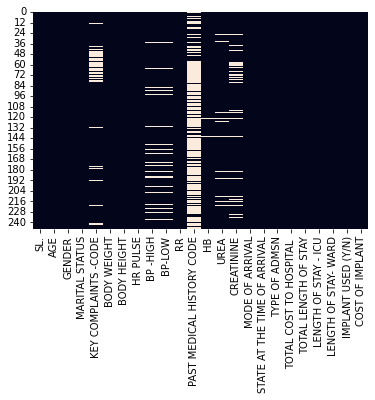

In [14]:
#understand the missing values of data
sns.heatmap(df.isnull(), cbar=False)

In [15]:
#find the skewness of all features in data
df1.skew( skipna=True)

SL.                        0.000000
AGE                        0.466891
BODY_WEIGHT                0.127305
BODY_HEIGHT               -0.885674
HR_PULSE                   0.330071
BP_HIGH                    0.838124
BP_LOW                     0.473346
RR                         0.760499
HB                         1.495045
UREA                       3.625638
CREATININE                 3.338276
TOTAL_COST_TO_HOSPITAL     2.455584
TOTAL_LENGTH_OF_STAY       1.854507
LENGTH_OF_STAY_ICU         2.997234
LENGTH_OF_STAY_WARD        0.960647
COST_OF_IMPLANT            4.119912
dtype: float64

In [16]:
#for high_bp:
high_bp=0.838124
if -0.5<high_bp<0.5:
    print("symmetric data")
elif -1<high_bp<-0.5:
    print("negatively skewed data")
else:
    print("positively skewed data")


positively skewed data


In [17]:
#since data is skewed and numeric we have to use median for missing values

df1["BP_HIGH"] = df1["BP_HIGH"].fillna(df1["BP_HIGH"].median())

In [18]:
#for low_bp:
low_bp=0.473346
if -0.5<low_bp<0.5:
    print("symmetric data")
elif -1<low_bp<-0.5:
    print("negatively skewed data")
else:
    print("positively skewed data")

symmetric data


In [19]:
#since data is symmetric and numeric we have to use mean for missing values
df1["BP_LOW"] = df1["BP_LOW"].fillna(df1["BP_LOW"].mean())

In [20]:
#for HB:
HB=1.495045
if -0.5<HB<0.5:
    print("symmetric data")
elif -1<HB<-0.5:
    print("negatively skewed data")
else:
    print("positively skewed data")

positively skewed data


In [21]:
#since data is skewed and numeric we have to use median for missing values

df1["HB"] = df1["HB"].fillna(df1["HB"].median())

In [22]:
#for UREA:
UREA=3.625638
if -0.5<UREA<0.5:
    print("symmetric data")
elif -1<UREA<-0.5:
    print("negatively skewed data")
else:
    print("positively skewed data")

positively skewed data


In [23]:
#since data is skewed and numeric we have to use median for missing values

df1["UREA"] = df1["UREA"].fillna(df1["UREA"].median())

In [24]:
#for CREATININE:
CREATININE=3.338276
if -0.5<CREATININE<0.5:
    print("symmetric data")
elif -1<CREATININE<-0.5:
    print("negatively skewed data")
else:
    print("positively skewed data")

positively skewed data


In [25]:
#since data is skewed and numeric we have to use median for missing values
df1["CREATININE"] = df1["CREATININE"].fillna(df1["CREATININE"].median())

In [26]:
df1.dtypes

SL.                               int64
AGE                             float64
GENDER                           object
MARITAL_STATUS                   object
KEY_COMPLAINTS_CODE              object
BODY_WEIGHT                     float64
BODY_HEIGHT                       int64
HR_PULSE                          int64
BP_HIGH                         float64
BP_LOW                          float64
RR                                int64
PAST_MEDICAL_HISTORY_CODE        object
HB                              float64
UREA                            float64
CREATININE                      float64
MODE_OF_ARRIVAL                  object
STATE_AT_THE_TIME_OF_ARRIVAL     object
TYPE_OF_ADMSN                    object
TOTAL_COST_TO_HOSPITAL          float64
TOTAL_LENGTH_OF_STAY              int64
LENGTH_OF_STAY_ICU                int64
LENGTH_OF_STAY_WARD               int64
IMPLANT_USED_(Y/N)               object
COST_OF_IMPLANT                   int64
dtype: object

In [27]:
#although its a categorical data but we can not pridict the KEY_COMPLAINTS_CODE so create a new category as unkown
df1["KEY_COMPLAINTS_CODE"] = df1["KEY_COMPLAINTS_CODE"].fillna("Unknown")
df1["KEY_COMPLAINTS_CODE"]

0      other- heart
1           CAD-DVD
2           CAD-TVD
3           CAD-DVD
4           CAD-DVD
           ...     
243    other- heart
244         CAD-TVD
245         CAD-TVD
246    other- heart
247             RHD
Name: KEY_COMPLAINTS_CODE, Length: 248, dtype: object

In [28]:
#check the percentage of values missing in PAST_MEDICAL_HISTORY_CODE
per=(173/248)*100
per

#since approx 70% of data is missing so we delete this entire column from our df

69.75806451612904

In [29]:
df2=df1.drop(["PAST_MEDICAL_HISTORY_CODE"],axis=1)
df2

SL.   AGE GENDER MARITAL_STATUS KEY_COMPLAINTS_CODE  BODY_WEIGHT  \
0      1  58.0      M        MARRIED        other- heart         49.2   
1      2  59.0      M        MARRIED             CAD-DVD         41.0   
2      3  82.0      M        MARRIED             CAD-TVD         46.6   
3      4  46.0      M        MARRIED             CAD-DVD         80.0   
4      5  60.0      M        MARRIED             CAD-DVD         58.0   
..   ...   ...    ...            ...                 ...          ...   
243  244  51.0      M        MARRIED        other- heart         69.0   
244  245  58.0      M        MARRIED             CAD-TVD         57.0   
245  246  44.0      M        MARRIED             CAD-TVD         58.0   
246  247  60.0      M        MARRIED        other- heart         65.0   
247  248  30.0      M        MARRIED                 RHD         71.0   

     BODY_HEIGHT  HR_PULSE  BP_HIGH  BP_LOW  RR    HB  UREA  CREATININE  \
0            160       118    100.0    80.0  32  11.4  33.0         0.8   
1            155        78     70.0    50.0  28  11.4  95.0         1.7   
2            164       100    110.0    80.0  20  11.8  15.0         0.8   
3            173       122    110.0    80.0  24  11.8  74.0         1.5   
4            175        72    180.0   100.0  18  10.0  48.0         1.9   
..           ...       ...      ...     ...  ..   ...   ...         ...   
243          176        62    130.0    90.0  24  13.2  26.0         1.1   
244          159        58    100.0    70.0  24  10.6  15.0         0.8   
245          159        68    150.0    90.0  24  15.2  23.0         0.9   
246          165        98    100.0    60.0  17  14.5  36.0         1.0   
247          180        87    130.0    40.0  20  12.6  15.0         0.8   

    MODE_OF_ARRIVAL STATE_AT_THE_TIME_OF_ARRIVAL TYPE_OF_ADMSN  \
0         AMBULANCE                        ALERT     EMERGENCY   
1         AMBULANCE                        ALERT     EMERGENCY   
2         WALKED IN                        ALERT      ELECTIVE   
3         AMBULANCE                        ALERT     EMERGENCY   
4         AMBULANCE                        ALERT     EMERGENCY   
..              ...                          ...           ...   
243       WALKED IN                        ALERT      ELECTIVE   
244       WALKED IN                        ALERT      ELECTIVE   
245       WALKED IN                        ALERT      ELECTIVE   
246       AMBULANCE                        ALERT     EMERGENCY   
247       WALKED IN                        ALERT      ELECTIVE   

     TOTAL_COST_TO_HOSPITAL   TOTAL_LENGTH_OF_STAY  LENGTH_OF_STAY_ICU  \
0                   660293.0                    25                  12   
1                   809130.0                    41                  20   
2                   362231.0                    18                   9   
3                   629990.0                    14                  13   
4                   444876.0                    24                  12   
..                       ...                   ...                 ...   
243                 295155.0                    10                   3   
244                 200321.0                    11                   2   
245                 191188.0                    13                   5   
246                 202807.0                     9                   6   
247                 248112.0                    10                   4   

     LENGTH_OF_STAY_WARD IMPLANT_USED_(Y/N)  COST_OF_IMPLANT  
0                     13                  Y            38000  
1                     21                  Y            39690  
2                      9                  N                0  
3                      1                  Y            89450  
4                     12                  N                0  
..                   ...                ...              ...  
243                    7                  Y            35000  
244                    9                 

In [30]:
df2.isnull().sum()

SL.                             0
AGE                             0
GENDER                          0
MARITAL_STATUS                  0
KEY_COMPLAINTS_CODE             0
BODY_WEIGHT                     0
BODY_HEIGHT                     0
HR_PULSE                        0
BP_HIGH                         0
BP_LOW                          0
RR                              0
HB                              0
UREA                            0
CREATININE                      0
MODE_OF_ARRIVAL                 0
STATE_AT_THE_TIME_OF_ARRIVAL    0
TYPE_OF_ADMSN                   0
TOTAL_COST_TO_HOSPITAL          0
TOTAL_LENGTH_OF_STAY            0
LENGTH_OF_STAY_ICU              0
LENGTH_OF_STAY_WARD             0
IMPLANT_USED_(Y/N)              0
COST_OF_IMPLANT                 0
dtype: int64

#### df2 has zero null values

In [31]:
df1.dtypes

SL.                               int64
AGE                             float64
GENDER                           object
MARITAL_STATUS                   object
KEY_COMPLAINTS_CODE              object
BODY_WEIGHT                     float64
BODY_HEIGHT                       int64
HR_PULSE                          int64
BP_HIGH                         float64
BP_LOW                          float64
RR                                int64
PAST_MEDICAL_HISTORY_CODE        object
HB                              float64
UREA                            float64
CREATININE                      float64
MODE_OF_ARRIVAL                  object
STATE_AT_THE_TIME_OF_ARRIVAL     object
TYPE_OF_ADMSN                    object
TOTAL_COST_TO_HOSPITAL          float64
TOTAL_LENGTH_OF_STAY              int64
LENGTH_OF_STAY_ICU                int64
LENGTH_OF_STAY_WARD               int64
IMPLANT_USED_(Y/N)               object
COST_OF_IMPLANT                   int64
dtype: object

#### handling categorical data

In [32]:
df2.dtypes

SL.                               int64
AGE                             float64
GENDER                           object
MARITAL_STATUS                   object
KEY_COMPLAINTS_CODE              object
BODY_WEIGHT                     float64
BODY_HEIGHT                       int64
HR_PULSE                          int64
BP_HIGH                         float64
BP_LOW                          float64
RR                                int64
HB                              float64
UREA                            float64
CREATININE                      float64
MODE_OF_ARRIVAL                  object
STATE_AT_THE_TIME_OF_ARRIVAL     object
TYPE_OF_ADMSN                    object
TOTAL_COST_TO_HOSPITAL          float64
TOTAL_LENGTH_OF_STAY              int64
LENGTH_OF_STAY_ICU                int64
LENGTH_OF_STAY_WARD               int64
IMPLANT_USED_(Y/N)               object
COST_OF_IMPLANT                   int64
dtype: object

###   By using Simple Encoding(Replacing values) and Lable Encoder

In [33]:
df2['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [34]:
df2['GENDER']= df2['GENDER'].replace('M',0).replace('F',1)
print(df2['GENDER'].dtype)
print(df2['GENDER'].unique())

int64
[0 1]


In [35]:
df2['MARITAL_STATUS'].unique()

array(['MARRIED', 'UNMARRIED'], dtype=object)

In [36]:
df2['MARITAL_STATUS']= df2['MARITAL_STATUS'].replace('MARRIED',0).replace('UNMARRIED',1)
print(df2['MARITAL_STATUS'].dtype)
print(df2['MARITAL_STATUS'].unique())

int64
[0 1]


In [37]:
df2['KEY_COMPLAINTS_CODE'].unique()

array(['other- heart', 'CAD-DVD', 'CAD-TVD', 'RHD', 'Unknown', 'CAD-SVD',
       'other- respiratory', 'other-nervous', 'other-tertalogy', 'ACHD',
       'OS-ASD', 'PM-VSD', 'CAD-VSD', 'other-general'], dtype=object)

In [38]:
sorted(df2['KEY_COMPLAINTS_CODE'].unique())

['ACHD',
 'CAD-DVD',
 'CAD-SVD',
 'CAD-TVD',
 'CAD-VSD',
 'OS-ASD',
 'PM-VSD',
 'RHD',
 'Unknown',
 'other- heart',
 'other- respiratory',
 'other-general',
 'other-nervous',
 'other-tertalogy']

In [39]:
lab_enco = LabelEncoder()
df2['KEY_COMPLAINTS_CODE'] = lab_enco.fit_transform(df2['KEY_COMPLAINTS_CODE'])
print(df2['KEY_COMPLAINTS_CODE'].dtype)
print(df2['KEY_COMPLAINTS_CODE'].unique())

int32
[ 9  1  3  7  8  2 10 12 13  0  5  6  4 11]


In [40]:
df2['MODE_OF_ARRIVAL'].unique()

array(['AMBULANCE', 'WALKED IN', 'TRANSFERRED'], dtype=object)

In [41]:
sorted(df2['MODE_OF_ARRIVAL'].unique())

['AMBULANCE', 'TRANSFERRED', 'WALKED IN']

In [42]:
lab_enco = LabelEncoder()
df2['MODE_OF_ARRIVAL'] = lab_enco.fit_transform(df2['MODE_OF_ARRIVAL'])
print(df2['MODE_OF_ARRIVAL'].dtype)
print(df2['MODE_OF_ARRIVAL'].unique())


int32
[0 2 1]


In [43]:
lab_enco = LabelEncoder()
df2['STATE_AT_THE_TIME_OF_ARRIVAL'] = lab_enco.fit_transform(df2['STATE_AT_THE_TIME_OF_ARRIVAL'])
print(df2['STATE_AT_THE_TIME_OF_ARRIVAL'].dtype)
print(df2['STATE_AT_THE_TIME_OF_ARRIVAL'].unique())

int32
[0 1]


In [44]:
df2['STATE_AT_THE_TIME_OF_ARRIVAL'].unique()

array([0, 1])

In [45]:
df2['TYPE_OF_ADMSN'].unique()

array(['EMERGENCY', 'ELECTIVE'], dtype=object)

In [46]:
lab_enco = LabelEncoder()
df2['TYPE_OF_ADMSN'] = lab_enco.fit_transform(df2['TYPE_OF_ADMSN'])
print(df2['TYPE_OF_ADMSN'].dtype)
print(df2['TYPE_OF_ADMSN'].unique())

int32
[1 0]


In [47]:
df2['IMPLANT_USED_(Y/N)'].unique() 

array(['Y', 'N'], dtype=object)

In [48]:
df2['IMPLANT_USED_(Y/N)']= df2['IMPLANT_USED_(Y/N)'].replace('N',0).replace('Y',1)
print(df2['IMPLANT_USED_(Y/N)'].dtype)
print(df2['IMPLANT_USED_(Y/N)'].unique())

int64
[1 0]


In [49]:
df2

SL.   AGE  GENDER  MARITAL_STATUS  KEY_COMPLAINTS_CODE  BODY_WEIGHT  \
0      1  58.0       0               0                    9         49.2   
1      2  59.0       0               0                    1         41.0   
2      3  82.0       0               0                    3         46.6   
3      4  46.0       0               0                    1         80.0   
4      5  60.0       0               0                    1         58.0   
..   ...   ...     ...             ...                  ...          ...   
243  244  51.0       0               0                    9         69.0   
244  245  58.0       0               0                    3         57.0   
245  246  44.0       0               0                    3         58.0   
246  247  60.0       0               0                    9         65.0   
247  248  30.0       0               0                    7         71.0   

     BODY_HEIGHT  HR_PULSE  BP_HIGH  BP_LOW  RR    HB  UREA  CREATININE  \
0            160       118    100.0    80.0  32  11.4  33.0         0.8   
1            155        78     70.0    50.0  28  11.4  95.0         1.7   
2            164       100    110.0    80.0  20  11.8  15.0         0.8   
3            173       122    110.0    80.0  24  11.8  74.0         1.5   
4            175        72    180.0   100.0  18  10.0  48.0         1.9   
..           ...       ...      ...     ...  ..   ...   ...         ...   
243          176        62    130.0    90.0  24  13.2  26.0         1.1   
244          159        58    100.0    70.0  24  10.6  15.0         0.8   
245          159        68    150.0    90.0  24  15.2  23.0         0.9   
246          165        98    100.0    60.0  17  14.5  36.0         1.0   
247          180        87    130.0    40.0  20  12.6  15.0         0.8   

     MODE_OF_ARRIVAL  STATE_AT_THE_TIME_OF_ARRIVAL  TYPE_OF_ADMSN  \
0                  0                             0              1   
1                  0                             0              1   
2                  2                             0              0   
3                  0                             0              1   
4                  0                             0              1   
..               ...                           ...            ...   
243                2                             0              0   
244                2                             0              0   
245                2                             0              0   
246                0                             0              1   
247                2                             0              0   

     TOTAL_COST_TO_HOSPITAL   TOTAL_LENGTH_OF_STAY  LENGTH_OF_STAY_ICU  \
0                   660293.0                    25                  12   
1                   809130.0                    41                  20   
2                   362231.0                    18                   9   
3                   629990.0                    14                  13   
4                   444876.0                    24                  12   
..                       ...                   ...                 ...   
243                 295155.0                    10                   3   
244                 200321.0                    11                   2   
245                 191188.0                    13                   5   
246                 202807.0                     9                   6   
247                 248112.0                    10                   4   

     LENGTH_OF_STAY_WARD  IMPLANT_USED_(Y/N)  COST_OF_IMPLANT  
0                     13                   1            38000  
1                     21                   1            39690  
2                      9                   0                0  
3                      1                   1            89450  
4                     12                   0                0  
..                   ...                 ...              ...  
243                    7 

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SL.                           248 non-null    int64  
 1   AGE                           248 non-null    float64
 2   GENDER                        248 non-null    int64  
 3   MARITAL_STATUS                248 non-null    int64  
 4   KEY_COMPLAINTS_CODE           248 non-null    int32  
 5   BODY_WEIGHT                   248 non-null    float64
 6   BODY_HEIGHT                   248 non-null    int64  
 7   HR_PULSE                      248 non-null    int64  
 8   BP_HIGH                       248 non-null    float64
 9   BP_LOW                        248 non-null    float64
 10  RR                            248 non-null    int64  
 11  HB                            248 non-null    float64
 12  UREA                          248 non-null    float64
 13  CREAT

# Data Visualization

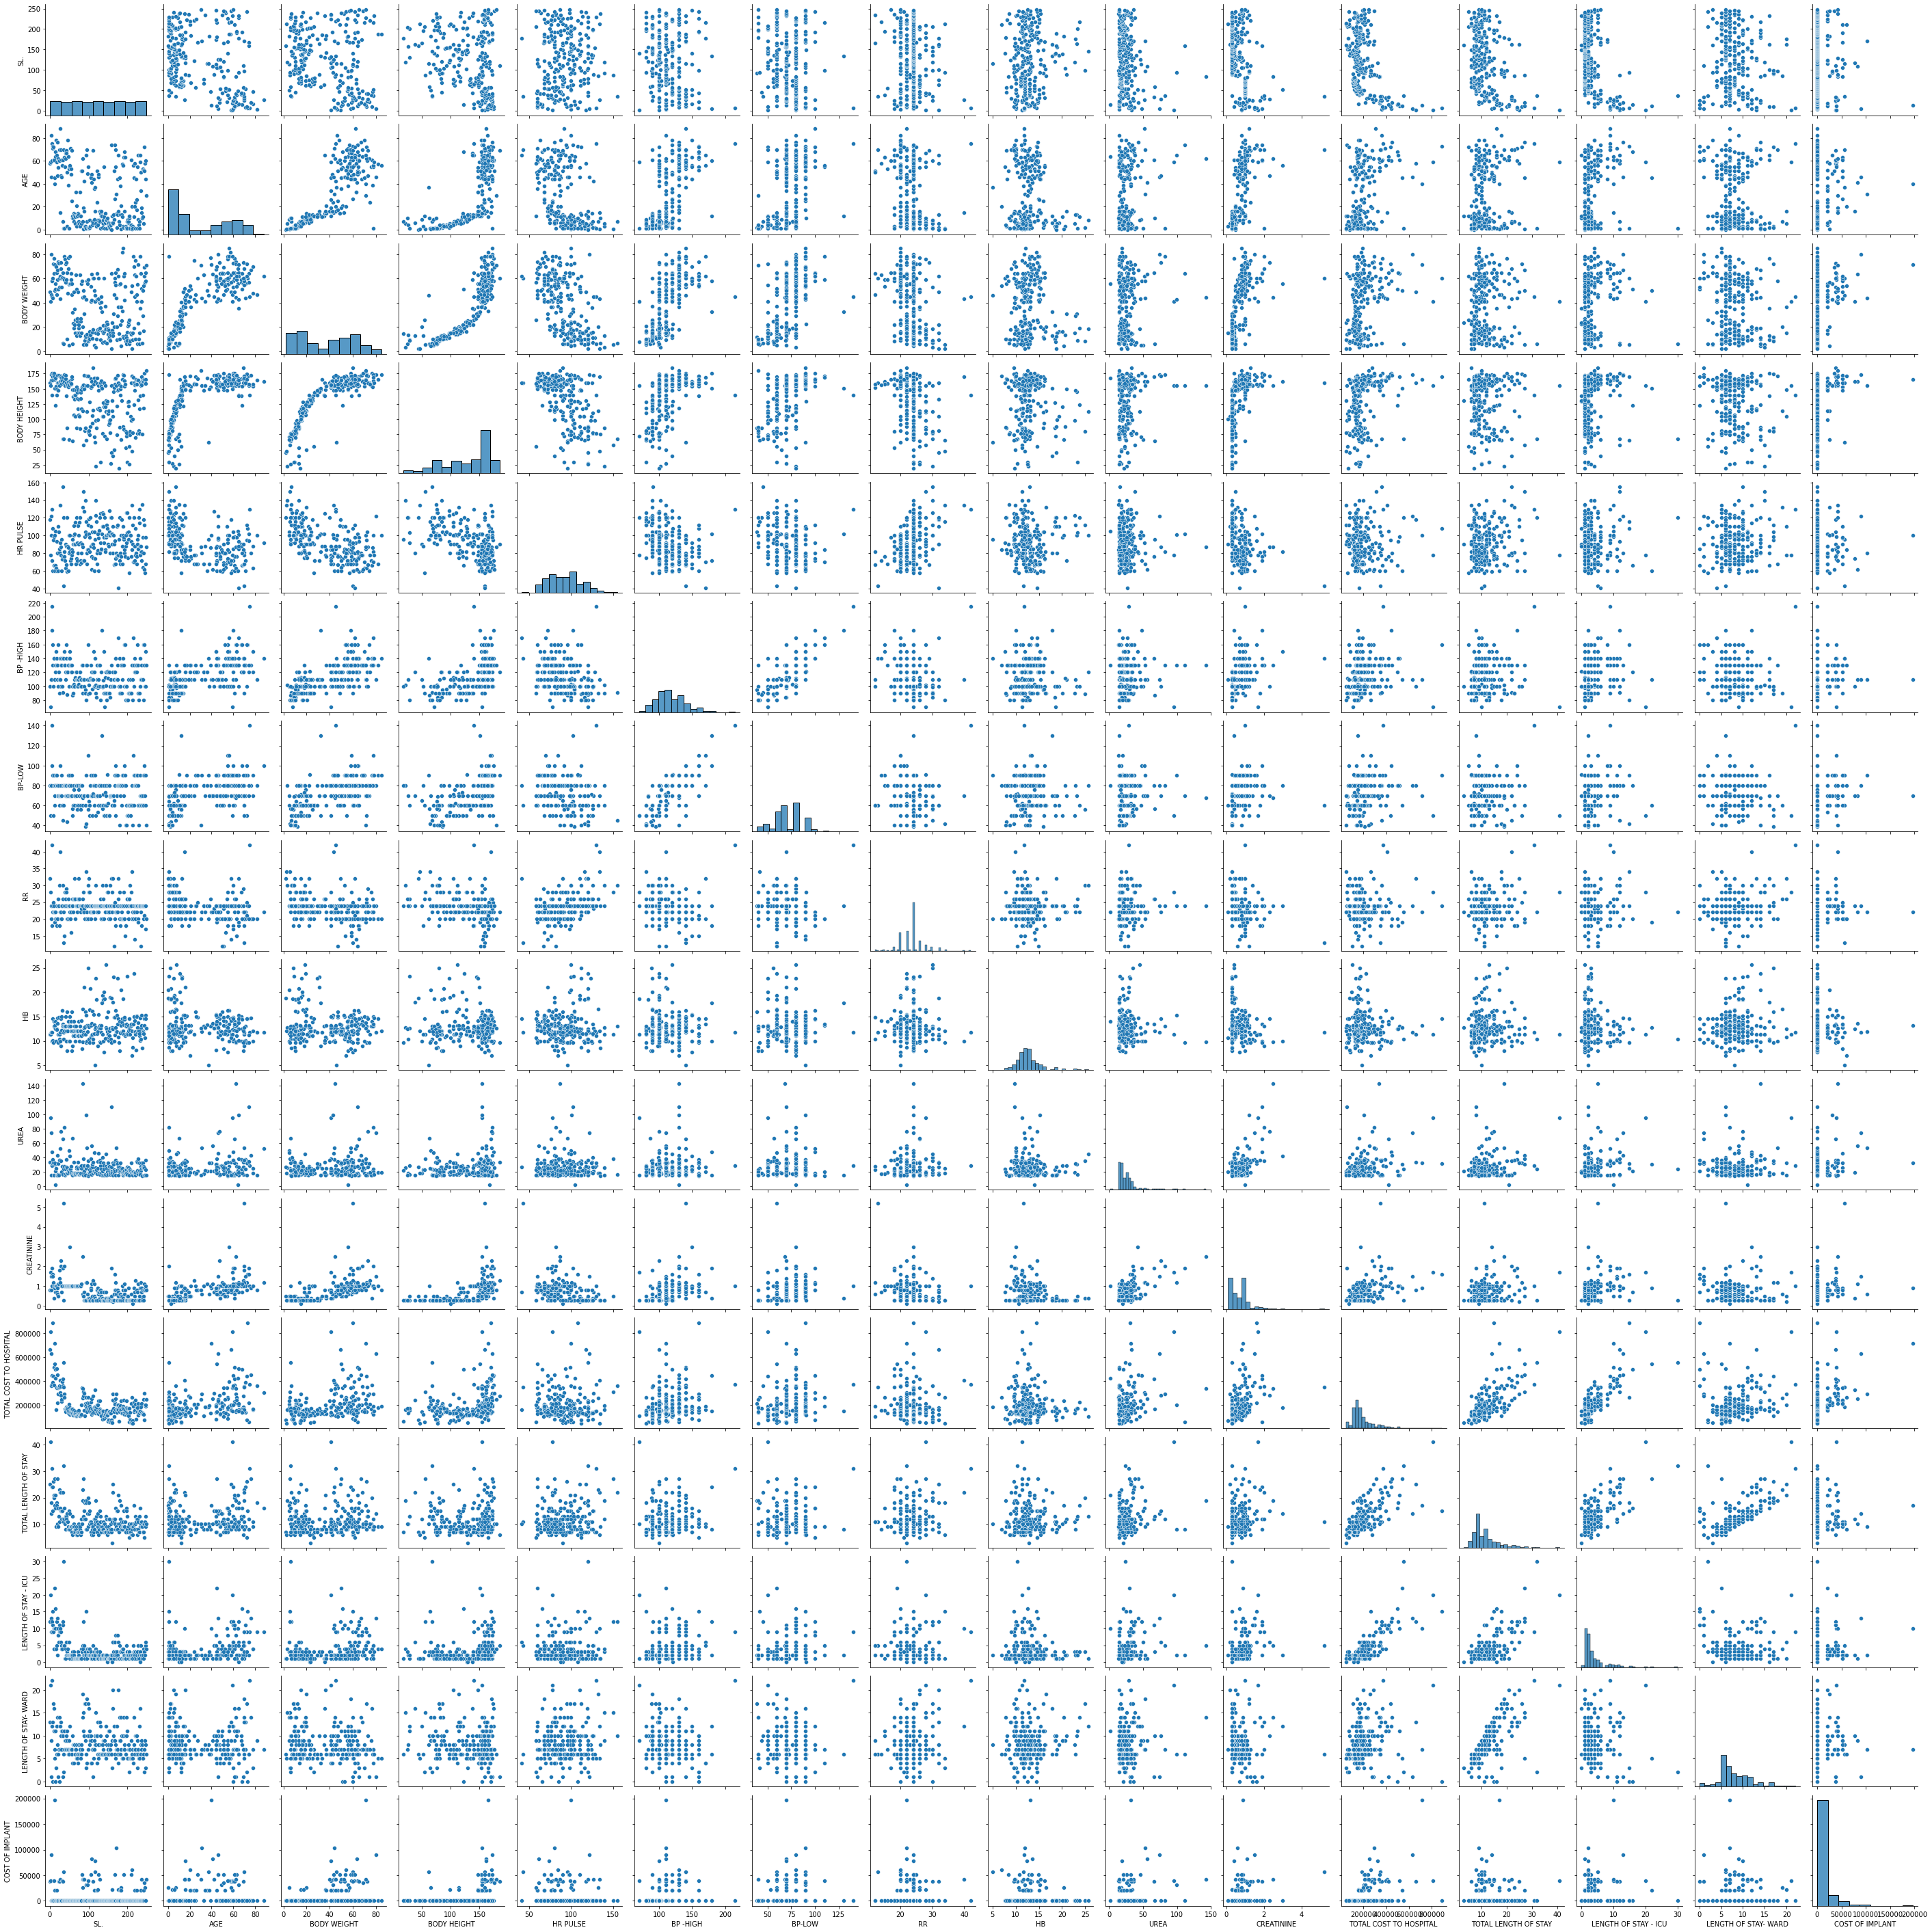

In [51]:
sns.pairplot(df)

<AxesSubplot:>

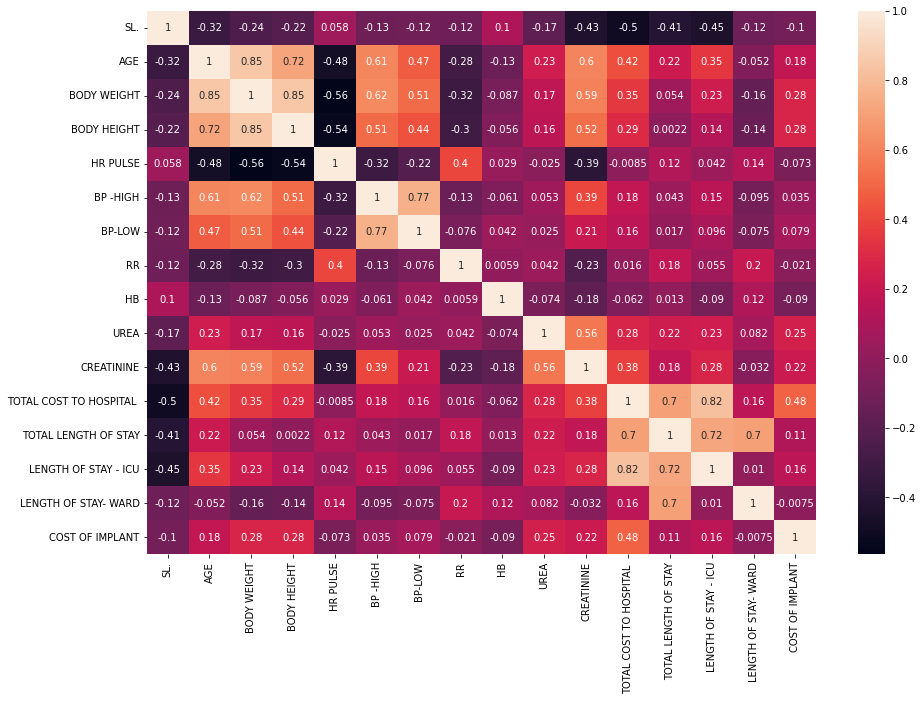

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

We can see from the above that none of our data features are in correlation to our target variable, `TOTAL_COST_TO_HOSPITAL`

#  feature selection

In [53]:
depend_var=df2[["TOTAL_COST_TO_HOSPITAL "]]
depend_var

TOTAL_COST_TO_HOSPITAL 
0                   660293.0
1                   809130.0
2                   362231.0
3                   629990.0
4                   444876.0
..                       ...
243                 295155.0
244                 200321.0
245                 191188.0
246                 202807.0
247                 248112.0

[248 rows x 1 columns]

In [54]:
independ_var=df2.drop(["SL.","TOTAL_COST_TO_HOSPITAL "],axis=1)
independ_var

AGE  GENDER  MARITAL_STATUS  KEY_COMPLAINTS_CODE  BODY_WEIGHT  \
0    58.0       0               0                    9         49.2   
1    59.0       0               0                    1         41.0   
2    82.0       0               0                    3         46.6   
3    46.0       0               0                    1         80.0   
4    60.0       0               0                    1         58.0   
..    ...     ...             ...                  ...          ...   
243  51.0       0               0                    9         69.0   
244  58.0       0               0                    3         57.0   
245  44.0       0               0                    3         58.0   
246  60.0       0               0                    9         65.0   
247  30.0       0               0                    7         71.0   

     BODY_HEIGHT  HR_PULSE  BP_HIGH  BP_LOW  RR    HB  UREA  CREATININE  \
0            160       118    100.0    80.0  32  11.4  33.0         0.8   
1            155        78     70.0    50.0  28  11.4  95.0         1.7   
2            164       100    110.0    80.0  20  11.8  15.0         0.8   
3            173       122    110.0    80.0  24  11.8  74.0         1.5   
4            175        72    180.0   100.0  18  10.0  48.0         1.9   
..           ...       ...      ...     ...  ..   ...   ...         ...   
243          176        62    130.0    90.0  24  13.2  26.0         1.1   
244          159        58    100.0    70.0  24  10.6  15.0         0.8   
245          159        68    150.0    90.0  24  15.2  23.0         0.9   
246          165        98    100.0    60.0  17  14.5  36.0         1.0   
247          180        87    130.0    40.0  20  12.6  15.0         0.8   

     MODE_OF_ARRIVAL  STATE_AT_THE_TIME_OF_ARRIVAL  TYPE_OF_ADMSN  \
0                  0                             0              1   
1                  0                             0              1   
2                  2                             0              0   
3                  0                             0              1   
4                  0                             0              1   
..               ...                           ...            ...   
243                2                             0              0   
244                2                             0              0   
245                2                             0              0   
246                0                             0              1   
247                2                             0              0   

     TOTAL_LENGTH_OF_STAY  LENGTH_OF_STAY_ICU  LENGTH_OF_STAY_WARD  \
0                      25                  12                   13   
1                      41                  20                   21   
2                      18                   9                    9   
3                      14                  13                    1   
4                      24                  12                   12   
..                    ...                 ...                  ...   
243                    10                   3                    7   
244                    11                   2                    9   
245                    13                   5                    8   
246                     9                   6                    3   
247                    10                   4                    6   

     IMPLANT_USED_(Y/N)  COST_OF_IMPLANT  
0                     1            38000  
1                     1            39690  
2                     0                0  
3                     1            89450  
4                     0                0  
..                  ...              ...  
243                   1            35000  
244                   1            26000  
245                   0                0  
246                   0                0  
247                   1            41800  

[248 rows x 21 columns]

In [55]:
###Apply feature selection
#first , i specify the lasso regression  model and I
#select a suitable alpha (equivalent penalty).
# The bigger the alpha the less features that will be selected

#then i use the selectFromModel object from sklearn ,which
#will select the features which coefficient are non-zero

In [56]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_sel_model.fit(independ_var,depend_var)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [57]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [58]:
#Lets print the number of total and selected fearures

#this is how we can make a list of the selected features.
selected_feature=independ_var.columns[(feature_sel_model.get_support())]
selected_feature

Index(['AGE', 'GENDER', 'MARITAL_STATUS', 'KEY_COMPLAINTS_CODE', 'BODY_WEIGHT',
       'BODY_HEIGHT', 'HR_PULSE', 'BP_HIGH', 'BP_LOW', 'RR', 'HB', 'UREA',
       'CREATININE', 'MODE_OF_ARRIVAL', 'STATE_AT_THE_TIME_OF_ARRIVAL',
       'TYPE_OF_ADMSN', 'TOTAL_LENGTH_OF_STAY', 'LENGTH_OF_STAY_ICU',
       'LENGTH_OF_STAY_WARD', 'IMPLANT_USED_(Y/N)', 'COST_OF_IMPLANT'],
      dtype='object')

In [59]:
print("total features:{}".format((independ_var.shape[1])))
print("selected features:{}".format(len(selected_feature)))

total features:21
selected features:21


In [60]:
independ_var[selected_feature]

AGE  GENDER  MARITAL_STATUS  KEY_COMPLAINTS_CODE  BODY_WEIGHT  \
0    58.0       0               0                    9         49.2   
1    59.0       0               0                    1         41.0   
2    82.0       0               0                    3         46.6   
3    46.0       0               0                    1         80.0   
4    60.0       0               0                    1         58.0   
..    ...     ...             ...                  ...          ...   
243  51.0       0               0                    9         69.0   
244  58.0       0               0                    3         57.0   
245  44.0       0               0                    3         58.0   
246  60.0       0               0                    9         65.0   
247  30.0       0               0                    7         71.0   

     BODY_HEIGHT  HR_PULSE  BP_HIGH  BP_LOW  RR    HB  UREA  CREATININE  \
0            160       118    100.0    80.0  32  11.4  33.0         0.8   
1            155        78     70.0    50.0  28  11.4  95.0         1.7   
2            164       100    110.0    80.0  20  11.8  15.0         0.8   
3            173       122    110.0    80.0  24  11.8  74.0         1.5   
4            175        72    180.0   100.0  18  10.0  48.0         1.9   
..           ...       ...      ...     ...  ..   ...   ...         ...   
243          176        62    130.0    90.0  24  13.2  26.0         1.1   
244          159        58    100.0    70.0  24  10.6  15.0         0.8   
245          159        68    150.0    90.0  24  15.2  23.0         0.9   
246          165        98    100.0    60.0  17  14.5  36.0         1.0   
247          180        87    130.0    40.0  20  12.6  15.0         0.8   

     MODE_OF_ARRIVAL  STATE_AT_THE_TIME_OF_ARRIVAL  TYPE_OF_ADMSN  \
0                  0                             0              1   
1                  0                             0              1   
2                  2                             0              0   
3                  0                             0              1   
4                  0                             0              1   
..               ...                           ...            ...   
243                2                             0              0   
244                2                             0              0   
245                2                             0              0   
246                0                             0              1   
247                2                             0              0   

     TOTAL_LENGTH_OF_STAY  LENGTH_OF_STAY_ICU  LENGTH_OF_STAY_WARD  \
0                      25                  12                   13   
1                      41                  20                   21   
2                      18                   9                    9   
3                      14                  13                    1   
4                      24                  12                   12   
..                    ...                 ...                  ...   
243                    10                   3                    7   
244                    11                   2                    9   
245                    13                   5                    8   
246                     9                   6                    3   
247                    10                   4                    6   

     IMPLANT_USED_(Y/N)  COST_OF_IMPLANT  
0                     1            38000  
1                     1            39690  
2                     0                0  
3                     1            89450  
4                     0                0  
..                  ...              ...  
243                   1            35000  
244                   1            26000  
245                   0                0  
246                   0                0  
247                   1            41800  

[248 rows x 21 columns]

In [61]:
independ_var.head()

AGE  GENDER  MARITAL_STATUS  KEY_COMPLAINTS_CODE  BODY_WEIGHT  \
0  58.0       0               0                    9         49.2   
1  59.0       0               0                    1         41.0   
2  82.0       0               0                    3         46.6   
3  46.0       0               0                    1         80.0   
4  60.0       0               0                    1         58.0   

   BODY_HEIGHT  HR_PULSE  BP_HIGH  BP_LOW  RR    HB  UREA  CREATININE  \
0          160       118    100.0    80.0  32  11.4  33.0         0.8   
1          155        78     70.0    50.0  28  11.4  95.0         1.7   
2          164       100    110.0    80.0  20  11.8  15.0         0.8   
3          173       122    110.0    80.0  24  11.8  74.0         1.5   
4          175        72    180.0   100.0  18  10.0  48.0         1.9   

   MODE_OF_ARRIVAL  STATE_AT_THE_TIME_OF_ARRIVAL  TYPE_OF_ADMSN  \
0                0                             0              1   
1                0                             0              1   
2                2                             0              0   
3                0                             0              1   
4                0                             0              1   

   TOTAL_LENGTH_OF_STAY  LENGTH_OF_STAY_ICU  LENGTH_OF_STAY_WARD  \
0                    25                  12                   13   
1                    41                  20                   21   
2                    18                   9                    9   
3                    14                  13                    1   
4                    24                  12                   12   

   IMPLANT_USED_(Y/N)  COST_OF_IMPLANT  
0                   1            38000  
1                   1            39690  
2                   0                0  
3                   1            89450  
4                   0                0

# Data Splitting

In [62]:
independ_var

AGE  GENDER  MARITAL_STATUS  KEY_COMPLAINTS_CODE  BODY_WEIGHT  \
0    58.0       0               0                    9         49.2   
1    59.0       0               0                    1         41.0   
2    82.0       0               0                    3         46.6   
3    46.0       0               0                    1         80.0   
4    60.0       0               0                    1         58.0   
..    ...     ...             ...                  ...          ...   
243  51.0       0               0                    9         69.0   
244  58.0       0               0                    3         57.0   
245  44.0       0               0                    3         58.0   
246  60.0       0               0                    9         65.0   
247  30.0       0               0                    7         71.0   

     BODY_HEIGHT  HR_PULSE  BP_HIGH  BP_LOW  RR    HB  UREA  CREATININE  \
0            160       118    100.0    80.0  32  11.4  33.0         0.8   
1            155        78     70.0    50.0  28  11.4  95.0         1.7   
2            164       100    110.0    80.0  20  11.8  15.0         0.8   
3            173       122    110.0    80.0  24  11.8  74.0         1.5   
4            175        72    180.0   100.0  18  10.0  48.0         1.9   
..           ...       ...      ...     ...  ..   ...   ...         ...   
243          176        62    130.0    90.0  24  13.2  26.0         1.1   
244          159        58    100.0    70.0  24  10.6  15.0         0.8   
245          159        68    150.0    90.0  24  15.2  23.0         0.9   
246          165        98    100.0    60.0  17  14.5  36.0         1.0   
247          180        87    130.0    40.0  20  12.6  15.0         0.8   

     MODE_OF_ARRIVAL  STATE_AT_THE_TIME_OF_ARRIVAL  TYPE_OF_ADMSN  \
0                  0                             0              1   
1                  0                             0              1   
2                  2                             0              0   
3                  0                             0              1   
4                  0                             0              1   
..               ...                           ...            ...   
243                2                             0              0   
244                2                             0              0   
245                2                             0              0   
246                0                             0              1   
247                2                             0              0   

     TOTAL_LENGTH_OF_STAY  LENGTH_OF_STAY_ICU  LENGTH_OF_STAY_WARD  \
0                      25                  12                   13   
1                      41                  20                   21   
2                      18                   9                    9   
3                      14                  13                    1   
4                      24                  12                   12   
..                    ...                 ...                  ...   
243                    10                   3                    7   
244                    11                   2                    9   
245                    13                   5                    8   
246                     9                   6                    3   
247                    10                   4                    6   

     IMPLANT_USED_(Y/N)  COST_OF_IMPLANT  
0                     1            38000  
1                     1            39690  
2                     0                0  
3                     1            89450  
4                     0                0  
..                  ...              ...  
243                   1            35000  
244                   1            26000  
245                   0                0  
246                   0                0  
247                   1            41800  

[248 rows x 21 columns]

In [63]:
depend_var

TOTAL_COST_TO_HOSPITAL 
0                   660293.0
1                   809130.0
2                   362231.0
3                   629990.0
4                   444876.0
..                       ...
243                 295155.0
244                 200321.0
245                 191188.0
246                 202807.0
247                 248112.0

[248 rows x 1 columns]

In [64]:
x_train, x_test, y_train, y_test = train_test_split(independ_var, depend_var, test_size=0.20, random_state=0)

In [65]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (198, 21)
x_test: (50, 21)
y_train: (198, 1)
y_test: (50, 1)


In [66]:
display("x_train:",x_train.head())
display("x_test:",x_test.head())
display("y_train:",y_train.head())
display("y_test:",y_test.head())

'x_train:'

AGE  GENDER  MARITAL_STATUS  KEY_COMPLAINTS_CODE  BODY_WEIGHT  \
108   7.0       0               1                    9         15.8   
18   76.0       0               0                    3         67.2   
205   1.0       0               1                    9          9.0   
15   78.0       1               0                    1         70.0   
71    5.0       1               1                   10         15.0   

     BODY_HEIGHT  HR_PULSE  BP_HIGH  BP_LOW  RR    HB  UREA  CREATININE  \
108          106        90    110.0    70.0  22  11.4  27.0         0.3   
18           172        80    130.0    80.0  20  14.7  43.0         0.9   
205           80       100     90.0    60.0  30  11.4  23.0         0.3   
15           154        63    150.0    90.0  20  10.0  25.0         1.0   
71           117        80    110.0    80.0  24  11.0  25.0         0.7   

     MODE_OF_ARRIVAL  STATE_AT_THE_TIME_OF_ARRIVAL  TYPE_OF_ADMSN  \
108                2                             0              0   
18                 2                             0              0   
205                2                             0              0   
15                 2                             0              0   
71                 2                             0              0   

     TOTAL_LENGTH_OF_STAY  LENGTH_OF_STAY_ICU  LENGTH_OF_STAY_WARD  \
108                     8                   1                    7   
18                     27                  13                   14   
205                     8                   1                    7   
15                      9                   4                    3   
71                      7                   1                    6   

     IMPLANT_USED_(Y/N)  COST_OF_IMPLANT  
108                   0                0  
18                    0                0  
205                   0                0  
15                    0                0  
71                    0                0

'x_test:'

AGE  GENDER  MARITAL_STATUS  KEY_COMPLAINTS_CODE  BODY_WEIGHT  \
247  30.0       0               0                    7         71.0   
168  55.0       0               0                    1         64.9   
76   33.0       1               0                    8         63.0   
150   6.0       1               1                    0         17.3   
145   1.0       1               1                    9          6.8   

     BODY_HEIGHT  HR_PULSE  BP_HIGH  BP_LOW  RR    HB  UREA  CREATININE  \
247          180        87    130.0    40.0  20  12.6  15.0         0.8   
168          167        74    140.0   100.0  18  16.2  15.0         0.8   
76           147        68    120.0    80.0  24  13.0  17.0         1.0   
150          114        88     90.0    50.0  24  10.1  22.0         0.3   
145           68       112     80.0    50.0  24  12.4  15.0         0.3   

     MODE_OF_ARRIVAL  STATE_AT_THE_TIME_OF_ARRIVAL  TYPE_OF_ADMSN  \
247                2                             0              0   
168                0                             0              1   
76                 0                             0              1   
150                2                             0              0   
145                2                             0              0   

     TOTAL_LENGTH_OF_STAY  LENGTH_OF_STAY_ICU  LENGTH_OF_STAY_WARD  \
247                    10                   4                    6   
168                    16                   8                    8   
76                      8                   1                    7   
150                    12                   1                   11   
145                    12                   2                   10   

     IMPLANT_USED_(Y/N)  COST_OF_IMPLANT  
247                   1            41800  
168                   0                0  
76                    0                0  
150                   0                0  
145                   0                0

'y_train:'

TOTAL_COST_TO_HOSPITAL 
108                129684.00
18                 449395.00
205                136040.00
15                 157763.00
71                 119935.36

'y_test:'

TOTAL_COST_TO_HOSPITAL 
247                248112.00
168                253368.00
76                 109085.84
150                 72374.00
145                154669.00

# Model training

In [67]:
lr=LinearRegression()
lr

LinearRegression()

In [68]:
lr.fit(x_train,y_train)

LinearRegression()

# Model Analysis

### predicting for y_axis

In [69]:
y_pred = lr.predict(x_test)
y_pred

array([[277875.12641375],
       [316396.70735879],
       [110182.67100435],
       [121425.23254355],
       [128907.43784219],
       [151028.21151752],
       [216005.80388741],
       [ 56986.97934529],
       [150175.22706312],
       [ 94898.37933227],
       [276141.23537269],
       [134044.05048437],
       [318898.190226  ],
       [211221.6502897 ],
       [280795.94078958],
       [125986.10748129],
       [156589.84031175],
       [304267.68343895],
       [119612.75865887],
       [396565.63591425],
       [143079.57631783],
       [113422.72891941],
       [255631.05011131],
       [144879.83037985],
       [134262.37574329],
       [111651.18472298],
       [241200.99614906],
       [132679.17501101],
       [122399.71969967],
       [125209.83758311],
       [175445.20850527],
       [373081.85737654],
       [136199.49059929],
       [132128.9241247 ],
       [ 97831.13198869],
       [432081.63425167],
       [363131.60577377],
       [110867.69344652],
       [7596

In [70]:
y_test

TOTAL_COST_TO_HOSPITAL 
247                248112.00
168                253368.00
76                 109085.84
150                 72374.00
145                154669.00
73                 152184.00
45                 164719.00
159                 49700.00
218                156374.00
213                 46093.00
96                 214679.00
201                109117.00
83                 334955.00
176                159882.00
161                288614.20
202                174074.00
55                 163483.00
116                323960.00
229                146700.00
92                 265243.00
203                169641.00
135                147132.00
162                239570.40
89                 109575.60
44                 169726.43
207                 73218.00
37                 260036.00
111                150337.00
63                 124804.00
109                167122.00
118                131430.00
8                  437529.07
189                163914.00
64                 142552.00
129                153445.00
5                  372357.00
22                 348687.00
125                127899.00
12                 711616.00
173                199677.00
241                248031.00
226                114513.00
107                253471.00
156                132226.00
75                 128196.00
178                180728.00
235                135612.00
130                135216.00
74                 122892.00
224                144731.00

In [71]:
residual = y_test - y_pred
residual

TOTAL_COST_TO_HOSPITAL 
247            -29763.126414
168            -63028.707359
76              -1096.831004
150            -49051.232544
145             25761.562158
73               1155.788482
45             -51286.803887
159             -7286.979345
218              6198.772937
213            -48805.379332
96             -61462.235373
201            -24927.050484
83              16056.809774
176            -51339.650290
161              7818.259210
202             48087.892519
55               6893.159688
116             19692.316561
229             27087.241341
92            -131322.635914
203             26561.423682
135             33709.271081
162            -16060.650111
89             -35304.230380
44              35464.054257
207            -38433.184723
37              18835.003851
111             17657.824989
63               2404.280300
109             41912.162417
118            -44015.208505
8               64447.212623
189             27714.509401
64              10423.075875
129             55613.868011
5              -59724.634252
22             -14444.605774
125             17031.306553
12             -48067.418441
173           -104079.794176
241             22460.284355
226              6307.836027
107            -35443.615132
156             21139.732729
75              18531.325603
178            -39101.314123
235            -17681.798743
130             -1551.163479
74             -10686.442113
224             38574.917649

## Evaluation of model

In [72]:
mse = mean_squared_error(y_test,y_pred)
mse

1658628917.2051797

In [73]:
mae = mean_absolute_error(y_test,y_pred)
mae

32030.091679424462

In [74]:
rmse = np.sqrt(mse)
rmse

40726.2681472926

In [75]:
R2_score = r2_score(y_test,y_pred)
R2_score

0.8641533986080341

In [76]:
adj_r2 = 1 - ((1-R2_score)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))
adj_r2

0.849533136574818

## Final model on entire data

In [77]:
lr_final = LinearRegression()
lr_final.fit(independ_var,depend_var)
lr_final

LinearRegression()

In [78]:
y_pred_new = lr_final.predict(x_test)
r2_score_new = r2_score(y_test,y_pred_new)
r2_score_new

0.8914009528359456

In [79]:
Adj_r2 = 1 - ((1-r2_score_new)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))
Adj_r2

0.8797131630066303

# KNN reg

In [80]:
from sklearn.neighbors import KNeighborsRegressor

#### creating instance of model

In [81]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train)

KNeighborsRegressor()

In [82]:
y_pred = knn_reg.predict(x_test)
y_pred

array([[283659.98 ],
       [200057.   ],
       [146195.032],
       [106987.572],
       [142505.51 ],
       [123668.476],
       [200465.976],
       [123860.   ],
       [180806.2  ],
       [143406.51 ],
       [237641.8  ],
       [116423.268],
       [283659.98 ],
       [195093.8  ],
       [123446.37 ],
       [130343.   ],
       [177753.848],
       [343219.8  ],
       [118236.2  ],
       [148297.51 ],
       [104061.476],
       [124302.2  ],
       [147002.434],
       [167502.858],
       [172815.   ],
       [ 87947.6  ],
       [140225.18 ],
       [140583.106],
       [134301.2  ],
       [145317.51 ],
       [146535.734],
       [223267.448],
       [167502.858],
       [125650.4  ],
       [114786.634],
       [346519.4  ],
       [446288.4  ],
       [155172.034],
       [343219.8  ],
       [136672.4  ],
       [180806.2  ],
       [130488.708],
       [343219.8  ],
       [104061.476],
       [144622.862],
       [183751.51 ],
       [122310.17 ],
       [14302

In [83]:
y_test

TOTAL_COST_TO_HOSPITAL 
247                248112.00
168                253368.00
76                 109085.84
150                 72374.00
145                154669.00
73                 152184.00
45                 164719.00
159                 49700.00
218                156374.00
213                 46093.00
96                 214679.00
201                109117.00
83                 334955.00
176                159882.00
161                288614.20
202                174074.00
55                 163483.00
116                323960.00
229                146700.00
92                 265243.00
203                169641.00
135                147132.00
162                239570.40
89                 109575.60
44                 169726.43
207                 73218.00
37                 260036.00
111                150337.00
63                 124804.00
109                167122.00
118                131430.00
8                  437529.07
189                163914.00
64                 142552.00
129                153445.00
5                  372357.00
22                 348687.00
125                127899.00
12                 711616.00
173                199677.00
241                248031.00
226                114513.00
107                253471.00
156                132226.00
75                 128196.00
178                180728.00
235                135612.00
130                135216.00
74                 122892.00
224                144731.00

## Evalution of the model

In [84]:
mse = mean_squared_error(y_test,y_pred)
mse

6363023230.94568

In [85]:
mean_absolute_error(y_test,y_pred)

49733.45568

In [86]:
r2_value = r2_score(y_test,y_pred)
r2_value

0.4788496260160361

In [87]:
Adj_R2 = 1 - ((1-r2_value)*(df.shape[0]-1)/(df.shape[0]-df.shape[1]-1))
Adj_R2

0.4227616933899593

#### using grid search cv

In [88]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [89]:
knn_model=KNeighborsRegressor()

In [90]:
hyperparamters = {'n_neighbors':np.arange(5,20),
                 'p':[1,2]}

gscv_model= GridSearchCV(knn_model,hyperparamters,cv=5)
gscv_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'p': [1, 2]})

In [91]:
gscv_model.best_params_

{'n_neighbors': 6, 'p': 1}

In [92]:
knn_model=KNeighborsRegressor(n_neighbors=6,p=1)
knn_model.fit(x_train,y_train)
y_pred_gscv=knn_model.predict(x_test)
r2_score(y_test,y_pred_gscv)

0.5203469157357674

#### Randomized search CV

In [93]:
knn_model=KNeighborsRegressor()

In [94]:
hyperparamters = {'n_neighbors':np.arange(2,25),
                 'p':[1,2]}
rscv_model= RandomizedSearchCV(knn_model,hyperparamters,cv=10)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24]),
                                        'p': [1, 2]})

In [95]:
rscv_model.best_params_

{'p': 1, 'n_neighbors': 7}

In [96]:
knn_model=KNeighborsRegressor(n_neighbors=3,p=1)
knn_model.fit(x_train,y_train)
y_pred_rscv=knn_model.predict(x_test)
r2_score(y_test,y_pred_rscv)

0.5642094606215796

# Decision Tree 

In [97]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [98]:
dt_model=DecisionTreeRegressor()
dt_model

DecisionTreeRegressor()

In [99]:
new_model=DecisionTreeRegressor(min_samples_split= 10,
 min_samples_leaf= 6,
 max_depth= 75,
 criterion= 'friedman_mse')

In [100]:
new_model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=75,
                      min_samples_leaf=6, min_samples_split=10)

In [101]:
y_pred_new=new_model.predict(x_test)
r2_score(y_test,y_pred_new)

0.4049915936872097

In [102]:
plt.figure(figsize=(175,175))
tree=plot_tree(decision_tree=new_model,
               feature_names=df1.columns,
               filled=True)
print('Decision Tree')

Decision Tree


# Random forest 

In [103]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [104]:
rnfr_reg=RandomForestRegressor()
rnfr_reg.fit(x_train,y_train)

RandomForestRegressor()

In [105]:
y_pred=rnfr_reg.predict(x_test)
r2_value_test = r2_score(y_test,y_pred)

In [106]:
y_pred_train=rnfr_reg.predict(x_train)
r2_value_train = r2_score(y_train,y_pred_train)
print('test r2 is ',r2_value_test,'train r2 is ',r2_value_train)

test r2 is  0.5674016393051995 train r2 is  0.9698327419827074


## Hyper parameter tuning for Random Forest is not possible due to lack of system configuration